# Nearest Neighbors
Là 1 phương pháp phi tham số. Có 2 phương pháp học là unsupervised and supervised nearest neightbors.
- Supervised có 2 loại: phân loại đối với nhãn rời rạc, và hồi quy với nhãn liên tục
Nguyên tắc là tìm 1 lượng mẫu huấn luyện có khoảng cách gần nhất với điểm mới, và dự đoán nhãn của nó = những điểm kia
- Số lượng mẫu: hằng số (k-nearest) hoặc thay đổi dựa trên mật độ cục bộ(radius-based neighbor). 
- Với k-nearest, là phương pháp phổ biến nhất, sự lựa chọn 'k' phụ thuộc nhiều vào dữ liệu. Nói chung 'k' lớn thì làm giảm ảnh hưởng của nhiễu, nhưng ranh giới phân loại ít riêng biệt.
- Với radius, ta chỉ định bán kính cố định r, tính kcach giữa 1 điểm với mọi điểm khác, rồi xđịnh các điểm nằm trong bán kính điểm đã cho, lấy làm mẫu để dự đoán. Phương pháp này phù hợp hơn với các dữ liệu thưa thớt, mà các vùng dày đặc của ko gian đặc trưng sẽ đóng góp nhiều info hơn, các vùng thưa thớt ít info hơn; nhưng kém hiệu quả hơn khi số chiều tăng
- Khoảng cách: có thể là bất kỳ thước đo nào, như: Euclidean, Minkowski, Manhattan, Hamming,...

# I. Unsupervied Nearest Neighbors
Có 3 thuật toán: BallTree, KDTree, và Brute-force.
- Dưới đây ta trình bày lần lượt 2 bài toán liên quan đến Regression và Classification

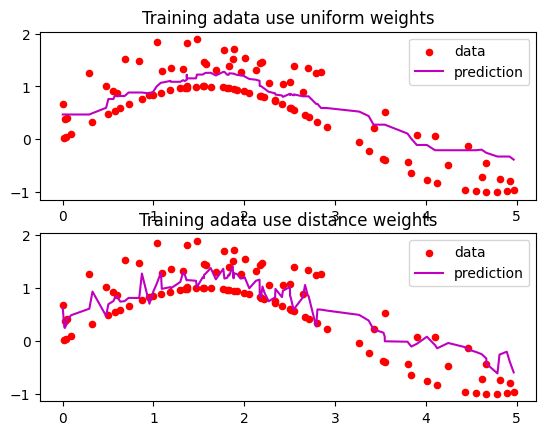

In [1]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt


# Set data
x = np.sort(5*np.random.rand(100, 1), axis = 0)
y = np.sin(x).ravel()
t = np.linspace(0, int(max(x)), 100)[:, np.newaxis]
y[::2] += (np.random.rand(50))

n_neighbors = 10
for i, weight in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight, metric="euclidean", algorithm="brute")
    y_pred = knn.fit(x, y).predict(t)                           # Predict(x) thì nó sẽ nối lại toàn bộ data, overfitting nặng
    plt.subplot(2, 1, i+1)
    plt.scatter(x, y, s= 20, color ='r', label = 'data')
    plt.plot(x, y_pred, label = 'prediction', color = 'm')
    plt.axis("tight")
    plt.legend()
    plt.title(f"Training adata use {weight} weights")

plt.show()

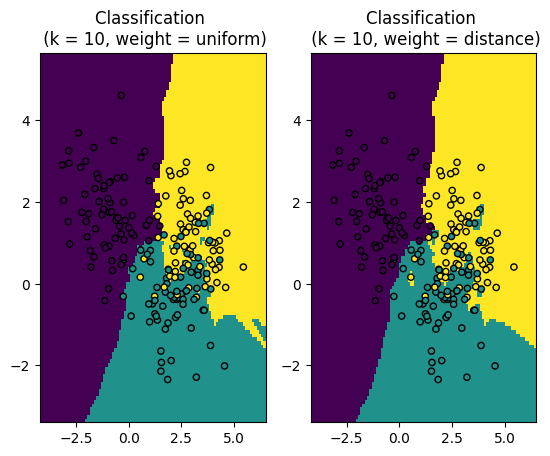

In [2]:
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs
from sklearn import neighbors
import numpy as np 
import matplotlib.pyplot as plt

centers = [[-1, 2], [2, 0], [3, 1]]
data_x, data_y  = make_blobs(n_samples=200, centers= centers)
_, axes = plt.subplots(1, 2)
weights = ["uniform", "distance"]
for i, weight in enumerate(weights):
    c = neighbors.KNeighborsClassifier(n_neighbors=8, weights=weight, algorithm="brute")
    c.fit(data_x, data_y)
    DecisionBoundaryDisplay.from_estimator(
        c,
        data_x,
        response_method = "predict",
        shading = "auto",
        plot_method='pcolormesh',
        ax = axes[i]
    )
    axes[i].scatter(data_x[:, 0], data_x[:, 1], c = data_y, s = 20, edgecolors='k')
    axes[i].set_title(f"Classification \n (k = 10, weight = {weights[i]})")

plt.show()


# II. Algorithms

1. Brute-force: tính toán mọi khoảng cách, phù hợp với bộ samples nhỏ, thiếu hiệu quả với lượng dữ liệu lớn.

2. Các cấu trúc khác giảm lượng tính toán bằng ý tưởng: A xa B, B gần C => A xa C (ko cần tính distance giữa A và C).

3. Với KD-tree: xây dựng KD-tree rất nhanh, và tính distance nhanh (O(logn)). KD rất nhanh với D thấp (< 20), nhưng ko hiệu quả khi D tăng cao (D: chiều). KD-tree phân chia dữ liệu dọc theo trục Descartes.

4. Ball-tree: giải quyết vde của KD-tree khi D cao. Ball-tree phân chia dữ liệu theo 1 loạt các hyper-spheres(siêu cầu) lồng nhau. Xây dựng cây này tốn kém hơn, nhưng có hiệu quả cao hơn nhiều khi D lớn (do phải tính distance ít hơn, chỉ cần tính từ test point tới tâm(centroid)).

# III. Neighborhood Components Analysis (NCA)

Đây là 1 thuật toán học số liệu của distance để cải thiện độ chính xác của Nearest neightbor classification.

Mục tiêu của NCA là tối đa hóa hàm sau, trong đó $p_i$ là xác suất i được phân loại đúng; N = n_samples:

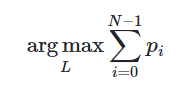

Ở đây $p_i = \displaystyle \sum_{j \in C_i} p_{ij}$, với $C_i$ là tập hợp các điểm cùng class với i, và ta cần chọn L:

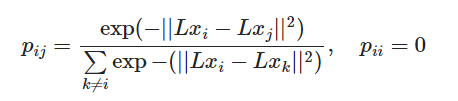

1. Classification: NCA rất hợp để phân loại vì nó có thể xử lý các vấn đề multi-class hiệu quả mà ko cần tăng kích thước model, và ko đưa thêm tham số gì cả. NCA đã được CM hoạt động tốt trong thực tế.

2. Giảm chiều: NCA có thể dùng để giảm chiều. Input data được chiếu lên 1 ko gian con tuyến tính. Kích thước ko gian mong muốn có thể dc đặc bởi tham số n_components 

Sau đây ta trình bày 1 bài toán giảm chiều sử dụng NCA:

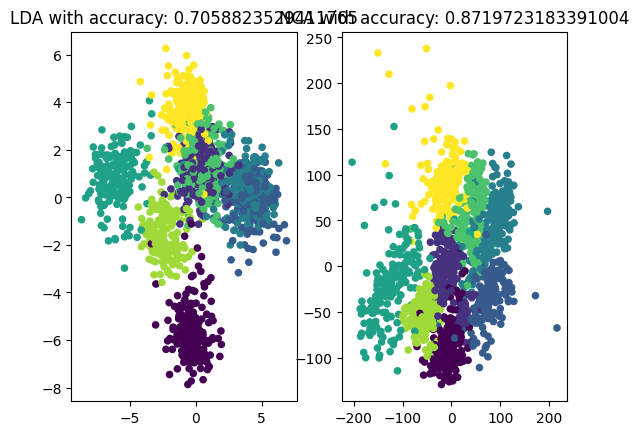

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

x, y = datasets.load_digits(return_X_y=True,n_class=8)                  # Bộ data, trong đó có chiều là 64, mỗi lớp có 180 mẫu
                                                                        # Trả về ma trận các vector, và tên của class của vector đó

# Chia mảng thành các tập con train và test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2))

knn = KNeighborsClassifier(n_neighbors=4)
reduce_func = [("LDA", lda), ("NCA", nca)]
for i, (name, model) in enumerate(reduce_func):
    plt.subplot(1, 2, i+1)
    model.fit(x_train, y_train)

    knn.fit(model.transform(x_train), y_train)                          # transform: áp dụng phép biến đổi đã học vào dữ liệu -> data mới
                                                                        # Phải sử dụng transform để ta học dữ liệu mới, nếu ko dùng thì accuracy của cả 2 = nhau, do chả có gì để học
                                                             
    accuracy_knn = knn.score(model.transform(x_test), y_test)           # Tính độ chính xác của việc phân loại
    x_final = model.transform(x)

    plt.scatter(x_final[:, 0], x_final[:, 1], c= y, s = 20)
    plt.title(f"{name} with accuracy: {accuracy_knn}")

plt.show()